In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras import layers
import matplotlib.pyplot as plt

Verover de data. Het is een dataset van IMDB met filmrecensies. De labels zijn binair en geven aan of een film wel of geen aanrader is volgens de reviews.

In [2]:
from keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=10000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=42,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

bekijk de geimporteerde data.

In [3]:
X_train[0:10]

array([list([1, 11, 4079, 11, 4, 1986, 745, 3304, 299, 1206, 590, 3029, 1042, 37, 47, 27, 1269, 2, 7637, 19, 6, 3586, 15, 1367, 3196, 17, 1002, 723, 1768, 2887, 757, 46, 4, 232, 1131, 39, 107, 3589, 11, 4, 4539, 198, 24, 4, 1834, 133, 4, 107, 7, 98, 413, 8911, 5835, 11, 35, 781, 8, 169, 4, 2179, 5, 259, 334, 3773, 8, 4, 3497, 10, 10, 17, 16, 3381, 46, 34, 101, 612, 7, 84, 18, 49, 282, 167, 2, 7173, 122, 24, 1414, 8, 177, 4, 392, 531, 19, 259, 15, 934, 40, 507, 39, 2, 260, 77, 8, 162, 5097, 121, 4, 65, 304, 273, 13, 70, 1276, 2, 8, 15, 745, 3304, 5, 27, 322, 2197, 2, 2, 70, 30, 2, 88, 17, 6, 3029, 1042, 29, 100, 30, 4943, 50, 21, 18, 148, 15, 26, 5980, 12, 152, 157, 10, 10, 21, 19, 3196, 46, 50, 5, 4, 1636, 112, 828, 6, 1003, 4, 162, 5097, 2, 517, 6, 2, 7, 4, 9527, 5593, 4, 351, 232, 385, 125, 6, 1693, 39, 2383, 5, 29, 69, 5593, 5670, 6, 162, 5097, 1567, 232, 256, 34, 718, 5612, 2980, 8, 6, 226, 762, 7, 2, 7830, 5, 517, 2, 6, 3242, 7, 4, 351, 232, 37, 9, 1861, 8, 123, 3196, 2, 5612, 188

Zoals je kunt zien bevat `X_train` vectoren met getallen. Elke vector staat voor een review. Elk getal staat voor een woord.

Met onderstaande code kun je een vector met getallen terugvertalen naar woorden. Run deze code.

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in X_train[0]])
decoded_review

"? in panic in the streets richard widmark plays u s navy doctor who has his week ? interrupted with a corpse that contains plague as cop paul douglas properly points out the guy died from two bullets in the chest that's not the issue here the two of them become unwilling partners in an effort to find the killers and anyone else exposed to the disease br br as was pointed out by any number of people for some reason director ? kazan did not bother to cast the small parts with anyone that sounds like they're from ? having been to new orleans where the story takes place i can personally ? to that richard widmark and his wife barbara ? ? can be ? because as a navy doctor he could be assigned there but for those that are natives it doesn't work br br but with plague out there and the news being kept a secret the new orleans ? starts a ? of the city's underworld the dead guy came off a ship from europe and he had underworld connections a new orleans wise guy played by jack palance jumps to a

In de tekst zie je een aantal vraagtekens. Een vraagteken staat in dit geval voor 'onbekend woord'.

De input is in deze vorm lastig te verwerken voor een neuraal netwerk. De getallen zijn categorische labels. Daarom gebruiken we One-hot-encoding. Helaas kan de `OneHotEncoder` uit sklearn niet overweg met deze input. Daarom maken we de input handmatig geschikt voor het neurale netwerk.

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    # Maak een matrix van de vorm (len(sequences), dimension) met nullen
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # zet de juiste waarden in results[i] op 1
    return results

In [6]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

Controleer of het omzetten van de data goed gegaan is

In [7]:
X_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Maak een neuraal netwerk dat met deze data overweg kan.

In [8]:
model = models.Sequential()
model.add(layers.Dense(4, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(3, activation = 'softmax'))
model.add(layers.Dense(3, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40004     
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 40,031
Trainable params: 40,031
Non-trainable params: 0
_________________________________________________________________


Kies een loss function en optimizer en compileer het netwerk. Bedenk hierbij goed welke het meest geschikt is voor het probleem dat je aan het oplossen bent en voor de vorm van de output.

In [9]:
from keras.optimizers import Adam

model.compile(Adam(lr=0.01),'sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 40004     
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 40,031
Trainable params: 40,031
Non-trainable params: 0
_________________________________________________________________


Split in train en validatieset

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=6)

Train je model model met de gemaakte train- en validatieset. 

In [11]:
data = model.fit(x_train, y_train, epochs = 20, batch_size = 64, validation_data = (x_val, y_val))

Epoch 1/20
333/333 [==============================] - 12s 18ms/step - loss: 0.4440 - accuracy: 0.8255 - val_loss: 0.3172 - val_accuracy: 0.8789
Epoch 2/20
333/333 [==============================] - 5s 14ms/step - loss: 0.2233 - accuracy: 0.9255 - val_loss: 0.3136 - val_accuracy: 0.8795
Epoch 3/20
333/333 [==============================] - 3s 8ms/step - loss: 0.1647 - accuracy: 0.9496 - val_loss: 0.3405 - val_accuracy: 0.8779
Epoch 4/20
333/333 [==============================] - 3s 8ms/step - loss: 0.1374 - accuracy: 0.9593 - val_loss: 0.3700 - val_accuracy: 0.8757
Epoch 5/20
333/333 [==============================] - 2s 7ms/step - loss: 0.1110 - accuracy: 0.9680 - val_loss: 0.3991 - val_accuracy: 0.8763
Epoch 6/20
333/333 [==============================] - 3s 9ms/step - loss: 0.1063 - accuracy: 0.9675 - val_loss: 0.4387 - val_accuracy: 0.8667
Epoch 7/20
333/333 [==============================] - 3s 9ms/step - loss: 0.0809 - accuracy: 0.9788 - val_loss: 0.4694 - val_accuracy: 0.8691
Epo

Plot een learning curve. Zet de accuraatheid uit tegen de epochs en maak onderscheid tussen de training en validatie data. Wat zou volgens dit figuur het optimale aantal epochs zijn?

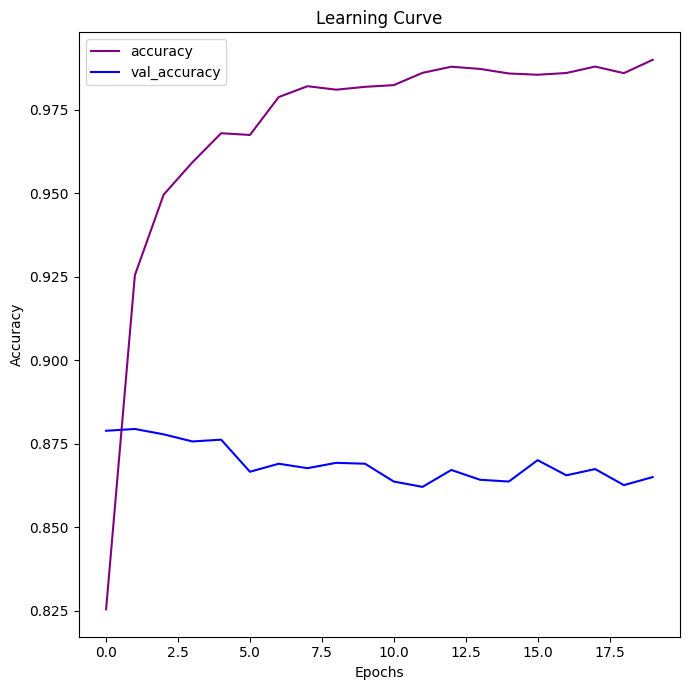

In [12]:
plt.subplots(1, figsize=(7,7))

plt.plot(data.history['accuracy'], label='accuracy', color='purple')
plt.plot(data.history['val_accuracy'], label='val_accuracy', color='blue')

plt.title("Learning Curve")
plt.xlabel("Epochs"), plt.ylabel("Accuracy"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Plot een foutcurve. Zet de loss uit tegen de epochs en maak onderscheid tussen de training en validatie data. Bekijk of er misschien sprake is van overfitting/underfitting.

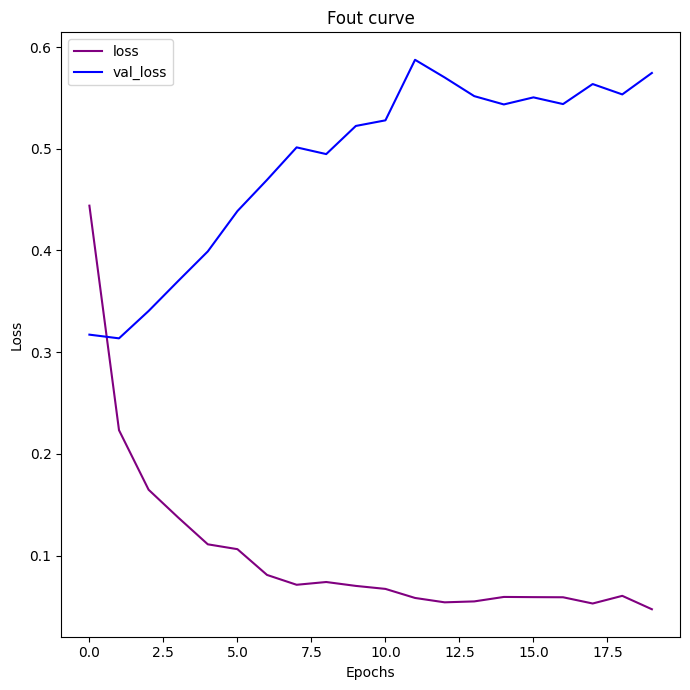

In [13]:
plt.subplots(1, figsize=(7,7))

plt.plot(data.history['loss'], label='loss', color='purple')
plt.plot(data.history['val_loss'], label='val_loss', color='blue')

plt.title("Fout curve")
plt.xlabel("Epochs"), plt.ylabel("Loss"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Test je model

In [14]:
model.evaluate(X_test, y_test) 

782/782 [==============================] - 2s 2ms/step - loss: 0.6353 - accuracy: 0.8510


[0.6352770924568176, 0.8510000109672546]

Kijk wat er gebeurt met de foutcurves van de train en validatiedata en met de testscore als je verschillende netwerken maakt met verschillende instellingen (aantal lagen, aantal neuronen, optimizer).

In [15]:
model = models.Sequential()

model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(3, activation='softmax'))

model.compile(Adam(lr=0.01),'sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 40004     
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
Total params: 40,019
Trainable params: 40,019
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
333/333 [==============================] - 8s 15ms/step - loss: 0.3430 - accuracy: 0.8605 - val_loss: 0.2762 - val_accuracy: 0.8888
Epoch 2/20
333/333 [==============================] - 4s 13ms/step - loss: 0.1815 - accuracy: 0.9311 - val_loss: 0.3139 - val_accuracy: 0.8795
Epoch 3/20
333/333 [==============================] - 3s 9ms/step - loss: 0.1384 - accuracy: 0.9490 - val_loss: 0.3658 - val_accuracy: 0.8728
Epoch 4/20
333/333

Bonusvraag: Zoek uit wat dropout lagen voor deep learning zijn en experimenteer met dropout lagen in jouw netwerk. Welke effect heeft dit op de resultaten?